In [1]:
#--------------------------------------------------------------------------------
# This Model builds a Sequential Deep Learning Model for Default Prediction problem
#--------------------------------------------------------------------------------

# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

# Algorithm Models to import
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

# All performance Metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
import numpy

# fix random seed for reproducibility
numpy.random.seed(42)





Using TensorFlow backend.


In [2]:
# Plotting Sub-function to display Training and Testing Set Accuracy

def Plot_Precision_Recall_Curve(precision, recall,averagePrecision):
    plt.clf()
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          averagePrecision))
    plt.show()

def plot_TrainTestAccuracy(xs, train_accuracy_list, dev_accuracy_list):
    plt.clf()
    plt.plot(xs, train_accuracy_list, label='train')
    plt.plot(xs, dev_accuracy_list, label='dev')
    plt.xlabel('Tuning Parameter')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_PrecisionRecall(xs, dev_precision_list, dev_recall_list):
    plt.clf()
    plt.plot(xs, dev_precision_list, label='Precision')
    plt.plot(xs, dev_recall_list, label='recall')
    plt.ylabel('Precision and Recall')
    plt.xlabel(' Tuning Parameter')
    plt.legend()
    plt.show() 

def plot_AUCROCCurve(fpr,tpr,AUC):
    plt.clf()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic' + str(AUC))
    plt.legend(loc="lower right")
    plt.show()    

def plot_kscurve(fpr,tpr):    
    plt.clf()    
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(tpr,[0,10,20,30,40,50,60,70,80,90,100]),color = 'r')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(fpr,[0,10,20,30,40,50,60,70,80,90,100]), color='navy', linestyle='--')
    plt.title('KS='+str(np.max(tpr - fpr)))
    plt.xlabel('quantile')
    plt.ylabel('FPR or TPR')
    plt.legend(('TPR','FPR'))
    plt.grid()    
    
# Get Error Type
def get_error_type(pred, label):
    # return the type of error: tp,fp,tn,fn
    if pred == label:
        return "tp" if pred == 1 else "tn"
    return "fp" if pred == 1 else "fn"    

# Custom function to get confusion Matrix     
def get_custom_confusionMatrix(predicted, truelabel):
    confusion_mat = np.zeros((2, 2))
    
    for k in range(0,len(predicted)):
        val = get_error_type(predicted[k], truelabel[k])
        if val == "tp":     
            confusion_mat[0][0] = confusion_mat[0][0] + 1
        elif val == "fp":     
            confusion_mat[0][1] = confusion_mat[0][1] + 1
        elif val == "fn":         
            confusion_mat[1][0] = confusion_mat[1][0] + 1
        else:
            confusion_mat[1][1] = confusion_mat[1][1] + 1
            
    return(confusion_mat)             

In [3]:
# Load All data Variables
import pickle

# Saving the objects:
with open('FinalAllVariablesIncl.pkl','rb') as f:  
    train_x,train_y,test_x,test_y,train_xnew,train_ynew,train_x1,train_y1 = pickle.load(f)
print('All data Retrieved')

print(train_x.shape)
print(train_y.shape)
print(train_x1.shape)
print(train_y1.shape)



All data Retrieved
(129535, 38)
(129535,)
(224462, 38)
(224462,)


In [5]:
def getModel2(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='uniform', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='uniform',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
    return model

In [6]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

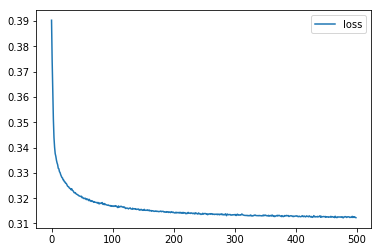

129535/129535 [==============================] - 2s 14us/step
Loss: 0.5348417571125015
Accuracy 73.0945304352834
[[ 5339.  3245.]
 [ 6477. 17323.]]
tp: 5339 , fp: 3245 , fn: 6477 , tn: 17323


In [8]:
firstModel=getModel2([38,120,1])
firstModel.fit(train_x1, train_y1.ravel(),epochs=500,callbacks=[plot_losses])

scores=firstModel.evaluate(train_x,train_y)
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

predY=firstModel.predict(test_x)
predY=np.round(predY).astype(int).reshape(1,-1)[0]

# Print Confusion Matrix for Performance Analysis
cfmatrix = get_custom_confusionMatrix(predY,test_y.ravel())
print(cfmatrix)
print("tp:", int(cfmatrix[0][0]), ", fp:", int(cfmatrix[0][1]),", fn:", int(cfmatrix[1][0]),", tn:", int(cfmatrix[1][1]))

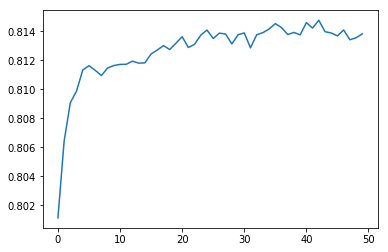

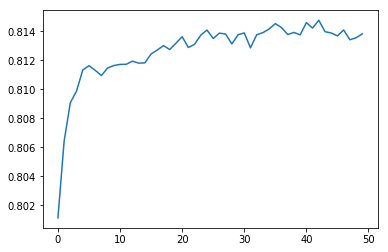

In [10]:
from matplotlib import pyplot

# plot metrics
pyplot.plot(history.history['acc'])
pyplot.show()

pyplot.plot(history.history['binary_accuracy'])
pyplot.show()

In [11]:
print(scores)

[0.5854362978696703, 0.704087698307778, 0.704087698307778]
